In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Merge the election data and null_gamma_data on the filename column to combine gamma values
election_data = pd.read_csv("election table.csv")
null_gamma_data = pd.read_csv("null_gamma_values3.csv")
merged_data = pd.merge(election_data, null_gamma_data, on="filename")
merged_data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,filename,diff,linear voters failure,gamma,mirror,#candidates_x,level,...,Approval2,Approval1,polarization,median_voter_distance,median_voter_preference_distance,#candidates_y,choices,null_gamma,permissive_gamma,strict_gamma
0,3,3,3,Alaska_11082022_HouseDistrict1.csv,[],no,1.000000,NaN,2,STATE,...,"Ortiz, Daniel H. ""Dan""","Ortiz, Daniel H. ""Dan""",0.996997,0.415851,0.000000,2,3.0,1.000000,1.000000,1.000000
1,6,6,6,Alaska_11082022_HouseDistrict12.csv,[],no,1.000000,NaN,2,STATE,...,"Schrage, Calvin R.","Schrage, Calvin R.",0.996997,0.213552,0.000000,2,3.0,1.000000,1.000000,1.000000
2,7,7,7,Alaska_11082022_HouseDistrict13.csv,[],no,1.000000,NaN,2,STATE,...,"Josephson, Andy","Josephson, Andy",0.996997,0.409323,0.000000,2,3.0,1.000000,1.000000,1.000000
3,8,8,8,Alaska_11082022_HouseDistrict14.csv,[],no,1.000000,NaN,2,STATE,...,"Galvin, Alyse S.","Galvin, Alyse S.",0.997998,0.000000,0.000000,2,3.0,1.000000,1.000000,1.000000
4,10,10,10,Alaska_11082022_HouseDistrict16.csv,[],no,1.000000,NaN,2,STATE,...,"Armstrong, Jennifer ""Jennie""","Armstrong, Jennifer ""Jennie""",0.997998,0.274499,0.000000,2,3.0,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,232,232,232,NewYorkCity_06222021_DEMCouncilMember7thCounci...,[],no,0.586629,NaN,12,LOCAL,...,Shaun Abreu,Shaun Abreu,0.166166,0.000000,0.000000,12,5.0,0.130330,0.586629,0.313518
401,234,234,234,NewYorkCity_06222021_DEMCouncilMember9thCounci...,"['IRV', 'Condorcet']",yes,0.525760,NaN,13,LOCAL,...,Bill Perkins,Bill Perkins,0.198198,0.088649,0.072242,13,5.0,0.123900,0.525760,0.263873
402,235,235,235,NewYorkCity_06222021_DEMMayorCitywide.csv,[],no,0.462661,NaN,13,LOCAL,...,Eric L. Adams,Eric L. Adams,0.130130,0.096646,0.085003,13,5.0,0.128958,0.462661,0.165850
403,206,206,206,NewYorkCity_06222021_DEMCouncilMember26thCounc...,[],no,0.480000,NaN,15,LOCAL,...,Julie Won,Julie Won,0.117117,0.007974,0.007974,15,5.0,0.119381,0.480000,0.210711


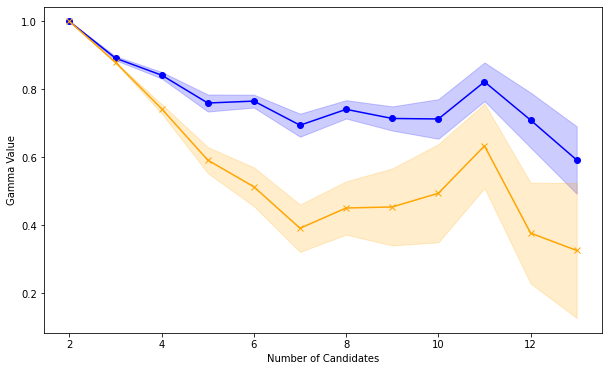

In [12]:


# Filter out elections with two or fewer candidates, and restrict #candidates to a maximum of 15
filtered_data = merged_data[(merged_data['#candidates_x'] >= 2) & (merged_data['#candidates_x'] <= 13)]

# Sort the data by #candidates to ensure a clear trend in the plot
filtered_data = filtered_data.sort_values(by="#candidates_x")
# Calculate the mean and standard error of gamma and null_gamma for each candidate count
grouped_data = filtered_data.groupby('#candidates_y').agg(
    gamma_mean=('gamma', 'mean'),
    gamma_sem=('gamma', lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
    null_gamma_mean=('null_gamma', 'mean'),
    null_gamma_sem=('null_gamma', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

# Plot the mean values with shaded areas representing the standard error
plt.figure(figsize=(10, 6))

# Plot observed gamma with standard error shading
plt.plot(grouped_data['#candidates_y'], grouped_data['gamma_mean'], label='Mean Observed Gamma', marker='o', color='blue')
plt.fill_between(grouped_data['#candidates_y'],
                 grouped_data['gamma_mean'] - grouped_data['gamma_sem'],
                 grouped_data['gamma_mean'] + grouped_data['gamma_sem'],
                 color='blue', alpha=0.2)

# Plot null gamma with standard error shading
plt.plot(grouped_data['#candidates_y'], grouped_data['null_gamma_mean'], label='Mean Null Gamma', marker='x', color='orange')
plt.fill_between(grouped_data['#candidates_y'],
                 grouped_data['null_gamma_mean'] - grouped_data['null_gamma_sem'],
                 grouped_data['null_gamma_mean'] + grouped_data['null_gamma_sem'],
                 color='orange', alpha=0.2)

# Set plot labels and title
plt.xlabel('Number of Candidates')
plt.ylabel('Gamma Value')
#plt.title('Mean Gamma vs. Number of Candidates with Standard Error')
#plt.legend()
plt.grid(False)

plt.show()
